# FIT5196 Assessment 1: Text Processing
#### Student Name: Shubham S. Diwe
#### Student ID: 29329604
#### Lecturer: Mohammad Haqqani
#### Tutor: Rasika Amarasiri

Date: 02-Sept-2018

Environment: Python 3.6.4 and Jupyter notebook
Libraries used: 
* re (for regular expression, included in Anaconda Python 3) 
* JSON (for converting to JSON format)
* operator (for sorting a dictionary based on values)


## Task 1. Parsing Raw-Text Files 

### Objective:
* To pre-process raw textual data for extraction
* To extract textual data from raw text files after pre-processing
* To write the collected data to a file in xml format
* To write the collected data to a file in json format

### Note:
#### Please make sure you have the following files in the same directory/folder as this notebook is opened in.
* 29329604.dat

## 1. Importing the libraries
#### The following code will import the required libraries in the jupyter notebook

In [1]:
import re
import json

## 2. Reading the file
#### The following code will read the input text file containing the advertisements.
#### It is assumed that the text file "29329604.dat" is in the same directory as the jupyter notebook.
The file will be read in a variable & the variable is then used for furhter processing

In [2]:
file_name = "29329604.dat"
file_open = open(file_name)
file_contents = file_open.read()
file_open.close()

## 3A. Finding the keys in the text
#### The set of keys for which the information is to be retrieved are {ID, Title, Description, Qualification, Responsibilities, Procedure, Location, Start Date, Deadline & Company Information}
#### The following code gets the different types of keys in the advertisements & their counts.
It is a generic single regular expression based on looking at the keys type in the dataset & checking a subset of few advertisements on pythex.

Following regular expressions were made while working on the task and then the final regular expression used below was selected.

* (?:^[\s]?^[A-Za-z_ ]*:)(.*?)(?:^[\s]?^[A-Za-z_ ]*:)
* ^([A-Za-z]*[_ ]?[A-Za-z]*):
* ([\w\W\s]*?)(?:\w*?[\s]?\w*:)
*  (?:^[\s]?^[A-Za-z_ ]*:)(.*?)(?=^[\s]?^[A-Za-z_ ]*:)

#### The below code for counting occurrences of an element in a dictionary is inspired from the FIT9133 2018 S1 teachings.

In [3]:
keys_list = re.findall("^([A-Z]*[ ][A-Z]*:|[A-Za-z]*[_]?[A-Za-z]*:)", file_contents, re.MULTILINE)
keys_dict = {}
for keys in keys_list:
    if keys in keys_dict:
        keys_dict[keys] += 1
    else:
        keys_dict[keys] = 1
print(len(keys_dict))

384


## 3B. Sorting the dictionary based on most occurrence
#### The following code will sort the dictionary in descending order of its values & then collect the important keys in a new dictionary with their values.
* The below code for sorting a dictionary is taken from stcakoverflow website.
* Uncomment the "print(sorted_dict)" line to check how I arrived at the number 2500 for important keys dictionary.

In [4]:
import operator
sorted_dict = sorted(keys_dict.items(), key=operator.itemgetter(1), reverse=True)
#print(sorted_dict)
impt_keys_dict = {}
for key in keys_dict.keys():
    if keys_dict[key] > 2500:
        impt_keys_dict[key] = keys_dict[key]
print(len(impt_keys_dict))
print(impt_keys_dict)

51
{'ID:': 30224, 'JOB DESCRIPTION:': 11432, 'SALARY:': 11273, 'JOB_RESPS:': 4135, 'COMPANYS_INFO:': 5712, 'qualifications:': 3103, '_LOC:': 4234, 'PROCEDURE:': 11180, 'JOB TITLE:': 11157, 'DEAD_LINE:': 11215, '_description:': 4232, 'DATES:': 3909, 'RESP:': 3975, 'ABOUT:': 4177, 'QUALIFICATION:': 5604, 'LOCATIONS:': 5689, 'PROCEDURES:': 5657, 'JOB_T:': 3973, 'APPLICATION_DEADL:': 3972, 'REMUNERATION:': 5584, 'start_date:': 4242, 'JOB RESPONSIBILITIES:': 11115, 'JOB_LOC:': 3919, 'JOB_PROC:': 4200, 'DEADLINES:': 5654, 'responsibilities:': 3130, 'DESCRIPTION:': 5710, 'remuneration:': 4258, 'ABOUT COMPANY:': 11317, 'START DATE:': 11258, 'title:': 4197, 'REQUIRED QUALIFICATIONS:': 11250, 'JOB_PROCS:': 4010, 'APPLICATION_DL:': 4196, 'job_desc:': 3063, 'salary:': 3061, '_info:': 2996, 'procedures:': 3072, 'deadline:': 3122, 'LOCATION:': 11091, 'JOB_SAL:': 4007, '_LOCS:': 3163, 'JOB_DESC:': 3988, 'RESPONSIBILITY:': 5726, 'QUALIFS:': 3947, 'about_company:': 3939, 'DATE_START:': 3084, 'TITLES:':

#### The following are the most occurring values for the 11 keys we are interested in:

ID	Title	Description	Qualification	Responsibility	Procedure	Location	Salary	Start Date	Deadline	About Company
ID:	JOB TITLE:	JOB DESCRIPTION:	qualifications:	JOB_RESPS:	PROCEDURE:	_LOC:	SALARY:	DATES:	DEAD_LINE:	COMPANYS_INFO:
	JOB_T:	_description:	QUALIFICATION:	RESP:	PROCEDURES:	LOCATIONS:	REMUNERATION:	start_date:	APPLICATION_DEADL:	ABOUT:
	title:	DESCRIPTION:	REQUIRED QUALIFICATIONS:	JOB RESPONSIBILITIES:	JOB_PROC:	JOB_LOC:	remuneration:	START DATE:	DEADLINES:	ABOUT COMPANY:
	TITLES:	job_desc:	QUALIFS:	responsibilities:	JOB_PROCS:	LOCATION:	salary:	DATE_START:	APPLICATION_DL:	_info:
	_TTL:	JOB_DESC:	REQ_QUALS:	RESPONSIBILITY:	procedures:	_LOCS:	JOB_SAL:	START_DA:	deadline:	about_company:
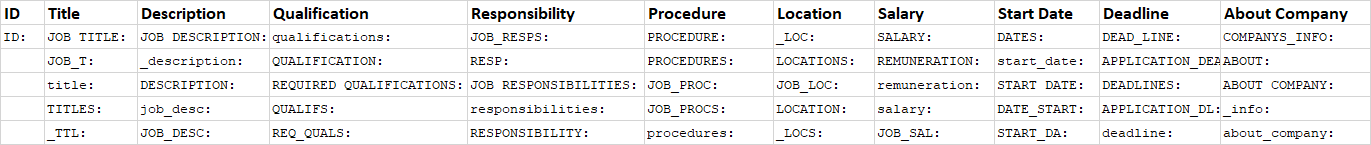

## 4. Substituting the keys with distinguishing key-symbols
#### The following code will find a particular key and replace it with a set of symbols followed by a key name so that information retrieval at a later stage becomes easier.
#### The following pattern will be prefixed before each key: "\#\#"key:
* The "##" are just 2 consecutive keys on keyboard and have very low likelihood of occurrence anywhere in any job ad.
* The modified version is collected in a new list for further processing.

#### The Below code takes some 2-3 minutes to run on my laptop with 16GB of RAM

In [5]:
# The below code will take some time to run as it is processing 30224 ads with more than 370,000 keys.
   
ad_id = re.sub("([\s]?ID:)[ ]","\n## ID:", file_contents, flags = re.MULTILINE|re.DOTALL, count=30224)
    
ad_title = re.sub("([\s]?JOB TITLE:|[\s]?JOB_T:|[\s]?title:|[\s]?TITLES:|[\s]?_TTL:)",\
                      "\n## job_title:", ad_id, flags = re.MULTILINE|re.DOTALL, count=30224)
    
ad_loc = re.sub("([\s]?_LOC:|[\s]?LOCATIONS:|[\s]?JOB_LOC:|[\s]?LOCATION:|[\s]?_LOCS:)",\
                    "\n## location:", ad_title, flags = re.MULTILINE|re.DOTALL, count=30224)
    
ad_desc = re.sub("([\s]?JOB DESCRIPTION:|[\s]?DESCRIPTION:|[\s]?JOB_DESC:|[\s]?_description:|[\s]?job_desc:)",\
                     "\n## job_description:", ad_loc, flags = re.MULTILINE|re.DOTALL, count=30224)
    
ad_resp = re.sub("([\s]?JOB_RESPS:|[\s]?RESP:|[\s]JOB RESPONSIBILITIES:|[\s]?responsibilities:|[\s]?RESPONSIBILITY:)",\
                     "\n## job_responsibility:", ad_desc, flags = re.MULTILINE|re.DOTALL, count = 30224)
    
ad_qual = re.sub("([\s]?qualifications:|[\s]?QUALIFICATION:|[\s]?REQUIRED QUALIFICATIONS:|[\s]?QUALIFS:|[\s]?REQ_QUALS:)",\
                         "\n## required_qualifications:", ad_resp, flags = re.MULTILINE|re.DOTALL, count =30224)
    
ad_proc = re.sub("([\s]?PROCEDURE[S]?:|[\s]?JOB_PROC[S]?:|[\s]?procedures:)",\
                     "\n## application_procedure:", ad_qual, flags = re.MULTILINE|re.DOTALL, count = 30224)
                     
ad_stda = re.sub("([\s]?DATES:|[\s]?START DATE:|[\s]?DATE_START:|[\s]start_date:|[\s]?START_DA:)",\
                     "\n## start_date:", ad_proc, flags = re.MULTILINE|re.DOTALL, count = 30224)
                     
ad_dl = re.sub("([\s]?DEADLINES:|[\s]?APPLICATION_D[\S]*?:|[\s]?deadline:|[\s]?DEAD_LINE:)",\
                   "\n## application_deadline:", ad_stda, flags = re.MULTILINE|re.DOTALL, count = 30224)
                     
ad_sal = re.sub("([\s]?SALARY:|[\s]?salary:|[\s]?JOB_SAL:|[\s]?REMUNERATION:|[\s]?remuneration:)",\
                    "\n## salary:", ad_dl, flags = re.MULTILINE|re.DOTALL, count = 30224)
                     
ad_info = re.sub("([\s]?ABOUT:|[\s]?_info:|[\s]ABOUT COMPANY:|[\s]?COMPANYS_INFO:|[\s]?about_company:)",\
                     "\n## about_company:", ad_sal, flags = re.MULTILINE|re.DOTALL, count=30224)

ad_clean = re.sub("(REMUNERATION/|OPEN TO/|START DATE/)"," ", ad_info, flags = re.MULTILINE|re.DOTALL, count = 30224)

# After trying to generate xml, an error occurred because of the "&" symbol.
# So, using a regex, I substituted all the "&" sumbols with "and".
ad_and = re.sub("\&", "and", ad_clean, flags = re.MULTILINE|re.DOTALL, count = 30224)

# After trying to generate xml, an error occurred because of the "<" symbol.
# So, using a regex, I substituted all the "<" sumbols with "&lt;".
ad_lt = re.sub("\<", "\&lt;", ad_and, flags = re.MULTILINE|re.DOTALL, count = 30224)

# After trying to generate xml, an error occurred because of the ">" symbol.
# So, using a regex, I substituted all the ">" sumbols with "&gt;".
ad_gt = re.sub("\>", "\&gt;", ad_lt, flags = re.MULTILINE|re.DOTALL, count = 30224)

# Each advertisement ends at this sequence of 30 dash line. 
# For the last key in the advertisements, this "##" symbol would not exist at the end.
# To address this issue, the "##" symbol is prepended to the 30 dash line.
adverts = re.sub("------------------------------", "##------------------------------",\
                 ad_gt, flags = re.MULTILINE|re.DOTALL, count = 30224)

## 5. Collecting the advertisements separately

* From looking at the contents of text file in Notepad++, it is found that every job advertisement ends with "------------------------------".
* So, splitting the contents by "------------------------------" would give a list of all advertisements separately.
* The following code will use the split function and collect the advertisements in a list.
* The last advertisement also ends with "------------------------------" so the last element of the list will be empty & hence removed.

In [6]:
advertisements = adverts.split("------------------------------")
advertisements.pop()
print(len(advertisements))

30224



## 6. Collecting the values corresponding to the keys
* The following code will collect all the key values in xml format & create a list for json processing
* The logic of the code is that for every advertisement in the list, find the values between two consecutive keys & collect the value as per the required format.
* Each key is searched for in the advertisements and the text in front of it till the start of next key is collected in a list for that key.
* A dictionary is also collected at the same time as it is required for the JSON format

In [7]:
#i = 0
# It was found that for making the json file, same data needs to be collected in a list of dictionaries.
# So, the json_dict was added to the loop to avoid making another for loop over same data for json.
id_lst = []
ttl_lst = []
loc_lst = []
desc_lst = []
resp_lst = []
qual_lst = []
sal_lst = []
proc_lst = []
stda_lst = []
ddl_lst = []
info_lst = []
json_lst = []

for ads in advertisements:
    json_dict = {}  # Initiate a json compatible dictionary for the current advertisement.
    
    job_ids = re.search("(?:\#\# ID:)(.*?)(?:[\n]?\#\#)", ads, flags = re.MULTILINE|re.DOTALL)
    id_lst.append(job_ids.group(1))        # Each advertisements has definitely got an ID. So, no need to check for empty.
    json_dict["_id"] = job_ids.group(1)
      
    job_ttl = re.search("(?:\#\# job_title:)(.*?)(?:[\n]?\#\#)", ads, flags = re.MULTILINE|re.DOTALL)
    if job_ttl == None:                    # If the matc is not found in the ad, then append NA to json-dictionary & xml-list
        ttl_lst.append('NA')
        json_dict["title"] = "NA"
    elif job_ttl.group(1).isspace():      # If the key exists but there is only white-space ahead, then append NA  
        ttl_lst.append('NA')
        json_dict["title"] = "NA"
    else:                                 # If the key exists and data is found then append data to json-dictionary & xml-list
        ttl_lst.append(job_ttl.group(1))
        json_dict["title"] = job_ttl.group(1)
        
    # The same logic is applicable to all other keys as described in the comments for job title.
       
    job_loc = re.search("(?:\#\# location:)(.*?)(?:[\n]?\#\#)", ads, flags = re.MULTILINE|re.DOTALL)
    if job_loc == None:
        loc_lst.append('NA')
        json_dict["location"] = "NA"
    elif job_loc.group(1).isspace():
        loc_lst.append('NA')
        json_dict["location"] = "NA"
    else:
        loc_lst.append(job_loc.group(1))
        json_dict["location"] = job_loc.group(1)
    
    job_des = re.search("(?:\#\# job_description:)(.*?)(?:[\n]?\#\#)", ads, flags = re.MULTILINE|re.DOTALL)
    if job_des == None:
        desc_lst.append(['NA'])
        json_dict["job_descriptions"] = ["NA"]
    elif job_des.group(1).isspace():
        desc_lst.append(['NA'])
        json_dict["job_descriptions"] = ["NA"]
    else:
        desc_lst.append(job_des.group(1).strip().split(".\n"))
        desc_dict = {}                              # As for json_format, the dictionary value should be a list
        desc_dict["description"] = job_des.group(1).strip().split(".\n")
        json_dict["job_descriptions"] = desc_dict
    
    job_res = re.search("(?:\#\# job_responsibility:)(.*?)(?:[\n]?\#\#)", ads, flags = re.MULTILINE|re.DOTALL)
    if job_res == None:
        resp_lst.append(['NA'])
        json_dict["job_responsibilities"] = ["NA"]
    elif job_res.group(1).isspace():
        resp_lst.append(['NA'])
        json_dict["job_responsibilities"] = ["NA"]
    else:
        resp_lst.append(job_res.group(1).strip().split("\n-"))
        resp_dict = {}                              # As for json_format, the dictionary value should be a list
        resp_dict["responsibility"] = job_res.group(1).strip().split("\n-")
        json_dict["job_responsibilities"] = resp_dict
        
    job_qua = re.search("(?:\#\# required_qualifications:)(.*?)(?:[\n]?\#\#)", ads, flags = re.MULTILINE|re.DOTALL)
    if job_qua == None:
        qual_lst.append(['NA'])
        json_dict["required_qualifications"] = ["NA"]
    elif job_qua.group(1).isspace():
        qual_lst.append(['NA'])
        json_dict["required_qualifications"] = ["NA"]
    else:
        qual_lst.append(job_qua.group(1).strip().split("\n-"))
        qual_dict = {}                             # As for json_format, the dictionary value should be a list
        qual_dict["qualification"] = job_qua.group(1).strip().split("\n-")
        json_dict["required_qualifications"] = qual_dict
        
    job_sal = re.search("(?:\#\# salary:)(.*?)(?:[\n]?\#\#)", ads, flags = re.MULTILINE|re.DOTALL)
    if job_sal == None:
        sal_lst.append('NA')
        json_dict["salary"] = "NA"
    elif job_sal.group(1).isspace():
        sal_lst.append('NA')
        json_dict["salary"] = "NA"
    else:
        sal_lst.append(job_sal.group(1))
        json_dict["salary"] = job_sal.group(1)
        
    job_pro = re.search("(?:\#\# application_procedure:)(.*?)(?:[\n]?\#\#)", ads, flags = re.MULTILINE|re.DOTALL)
    if job_pro == None:
        proc_lst.append('NA')
        json_dict["application_procedure"] = "NA"
    elif job_pro.group(1).isspace():
        proc_lst.append('NA')
        json_dict["application_procedure"] = "NA"
    else:
        proc_lst.append(job_pro.group(1))
        json_dict["application_procedure"] = job_pro.group(1)
        
    job_dat = re.search("(?:\#\# start_date:)(.*?)(?:[\n]?\#\#)", ads, flags = re.MULTILINE|re.DOTALL)
    if job_dat == None:
        stda_lst.append('NA')
        json_dict["start_date"] = "NA"
    elif job_dat.group(1).isspace():
        stda_lst.append('NA')
        json_dict["start_date"] = "NA"
    else:
        stda_lst.append(job_dat.group(1))
        json_dict["start_date"] = job_dat.group(1)
        
    job_ddl = re.search("(?:\#\# application_deadline:)(.*?)(?:[\n]?\#\#)", ads, flags = re.MULTILINE|re.DOTALL)
    if job_ddl == None:
        ddl_lst.append('NA')
        json_dict["application_deadline"] = "NA"
    elif job_ddl.group(1).isspace():
        ddl_lst.append('NA')
        json_dict["application_deadline"] = "NA"
    else:
        ddl_lst.append(job_ddl.group(1))
        json_dict["application_deadline"] = job_ddl.group(1)
        
    job_inf = re.search("(?:\#\# about_company:)(.*?)(?:[\n]?\#\#)", ads, re.MULTILINE|re.DOTALL)
    if job_inf == None:
        info_lst.append('NA')
        json_dict["about_company"] = "NA"
    elif job_inf.group(1).isspace():
        info_lst.append('NA')
        json_dict["about_company"] = "NA"
    else:
        info_lst.append(job_inf.group(1))
        json_dict["about_company"] = job_inf.group(1)
        
    json_lst.append(json_dict) # Collect the json compatible dictionary for each advertisement
    #i = i+1
    #print(i)

## 7. Writing to file in XML Format
* The following code will create a ".xml" file in same directory of your PC/Laptop as this notebook is opened in.
* The name of the file will be:
### 29329604.xml

#### The data collected so far from the text file will be written in "xml" format in the output file.

In [8]:
file_op = open("29329604.xml", "w+")                     # Create a new file and open for writing
file_op.write('<?xml version="1.0" encoding="UTF-8" ?>\n'\
              "<listings>\n")                            # Add the first main listings header
file_op.close()                                          # Close the file

with open("29329604.xml", "a") as file_xml:       # Open the file for appending each advertisement data
    i = 0
    while i < 30224:                                     # Write the advertisement data in xml format
                                                         # The first line written in file is as per the sample.xml
    
        file_xml.write('\t<listing id="' + id_lst[i] + '">\n'\
                       '\t\t<title>' + ttl_lst[i] + '</title>\n'\
                       '\t\t' + loc_lst[i] + '\n')
        
        file_xml.write('\t\t<job_descriptions>\n')
        for each in desc_lst[i]:
            file_xml.write('\t\t\t<description>' + each + '</description>\n')
        file_xml.write('\t\t</job_descriptions>\n\t\t<job_responsibilities>\n')
        for each in resp_lst[i]:
            file_xml.write('\t\t\t<responsibility>' + each + '</responsibility>\n')
        file_xml.write('\t\t</job_responsibilities>\n\t\t<required_qualifications>\n')
        for each in qual_lst[i]:
            file_xml.write('\t\t\t<qualification>' + each + '</qualification>\n')
        file_xml.write('\t\t</required_qualifications>\n\t\t<application_procedure>'\
                       + proc_lst[i] + '</application_procedure>\n\t\t<start_date>'\
                       + stda_lst[i] + '</start_date>\n\t\t<application_deadline>'\
                       + ddl_lst[i] + '</application_deadline>\n\t\t<about_company>'\
                       + info_lst[i] + '</about_company>\n\t</listing>\n')
                       
        i += 1
    file_xml.write('</listings>')                        #This just writes the final listings tag
file_xml.close()


## 8. Writing to file in JSON Format
* The following code will make use of the json library function json.dumps() to create a json file from the collected data
* Some initial preprocessing is done to bring the collected json_list in same format as the example JSON file
* A new file named:
### 29329604.json 
* will be created and all the data will be written in json format in the file

In [9]:
inner_json = {} # The inner dictionary as per the sample_json
outer_json = {} # The outer dictionary as per the sample_json

inner_json["listing"] = json_lst

outer_json["listings"] = inner_json

json_content = json.dumps(outer_json)

file_op_json = open("29329604.json", "w+")    # Create and open the file in write mode in the current directory
file_op_json.write(json_content)              # Write the contents to the file
file_op_json.close()                          # Close the file

## Summary:
### Section 3A shows how to find keys from the text
### Section 4 shows how to pre-process the text for data extraction
### Section 6 shows how to extract data from pre-processed text
### Section 7 shows how to write to a file i n XML format
### Section 8 shows how to write to a file in JSON format

## References:

* Monash University FIT5196 Semester 2 Year 2018 material
* Monash University FIT9133 Semester 1 Year 2018 material
* Website [StackOverFlow](https://stackoverflow.com/questions/tagged/python) for python and xml queries
* Python Documentation for [re](https://docs.python.org/3/library/re.html) library
* json Documentation for [json.dumps()](https://docs.python.org/3/library/json.html)
* Sample_xml file given in assessment resources
* [Pythex](https://pythex.org/)

### Note: This entire code takes about 3-5 minutes of maximum running time on my laptop (RAM = 16 GB)

In [10]:
from bs4 import BeautifulSoup
b = BeautifulSoup(open("29329604.xml"), "lxml-xml")
print("Success")

Success


In [11]:
import xml.etree.ElementTree as et
t = et.parse("29329604.xml")
print("Parsed")

Parsed


In [12]:
import json
file = open("29329604.json", "r")
#f = file.read()
x = json.load(file)
print("Loaded")

Loaded
